<a href="https://colab.research.google.com/github/SanGyuk-Raccoon/python/blob/master/Version_01_%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/DACON/[월간 데이콘] 14. 신용카드 사용자 연체 예측 AI/train.csv")

test = pd.read_csv("/content/drive/MyDrive/DACON/[월간 데이콘] 14. 신용카드 사용자 연체 예측 AI/test.csv")

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
train.apply(lambda x : len(set(x)),
            axis = 0)

index            26457
gender               2
car                  2
reality              2
child_num            9
income_total       249
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        6621
DAYS_EMPLOYED     3470
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
occyp_type          19
family_size         10
begin_month         61
credit               3
dtype: int64

In [ ]:
def credit_by_var_pie_chart(var) :
  unique_level = train[var].unique()

  fig_nrow = int(np.ceil(len(unique_level) / 3))

  if len(unique_level) > 2 :
    fig_ncol = 3
    f, ax = plt.subplots(fig_nrow, fig_ncol, figsize = (9 * fig_ncol, 8 * fig_nrow))

    for i, level in enumerate(unique_level) :
      train.query( f' {var} == "{level}" ')['credit'].value_counts().plot.pie(
                                            autopct = '%1.1f%%',
                                            ax = ax[i // 3, i % 3])
      ax[i // 3, i % 3].set_title(f"Credit of {var} : {level}")
  
  else :
    fig_ncol = 2
    print('good')
    
    f, ax = plt.subplots(fig_nrow, fig_ncol, figsize = (9 * fig_ncol, 8 * fig_nrow))

    for i, level in enumerate(unique_level) :
      train.query( f' {var} == "{level}" ')['credit'].value_counts().plot.pie(explode = [0.1] * 3,
                                            autopct = '%1.1f%%',
                                            ax = ax[i])
      ax[i].set_title(f"Credit of {var} : {level}")

good


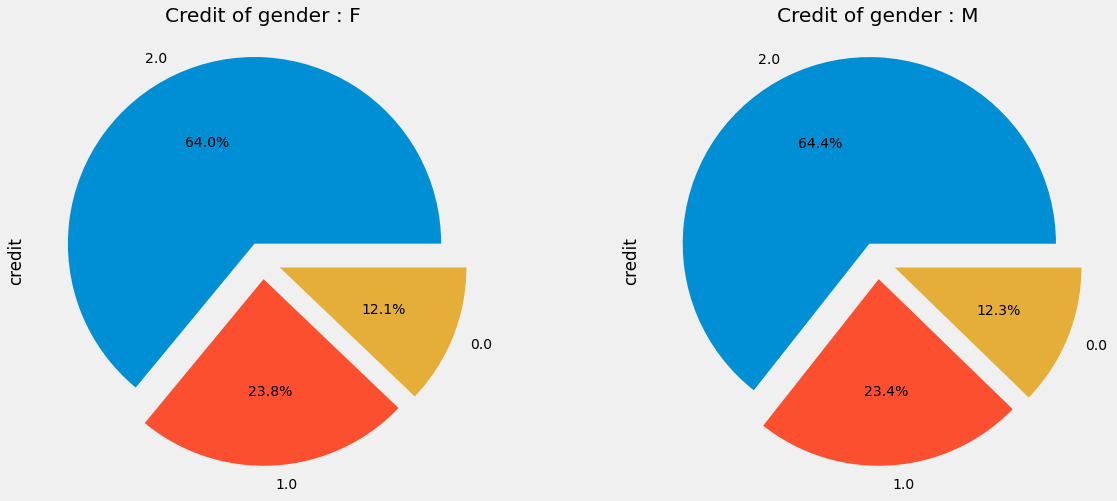

In [ ]:
credit_by_var_pie_chart("gender")

good


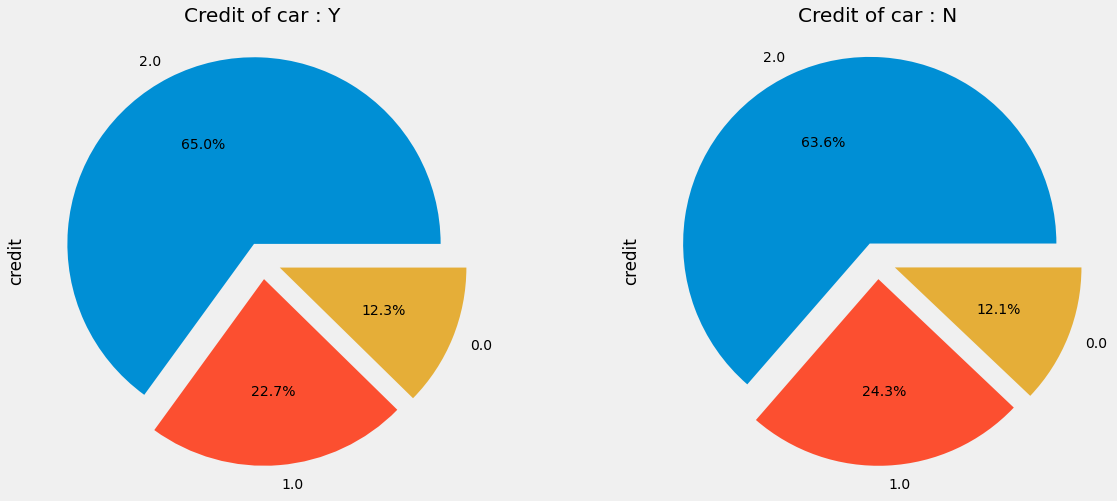

In [ ]:
credit_by_var_pie_chart("car")

good


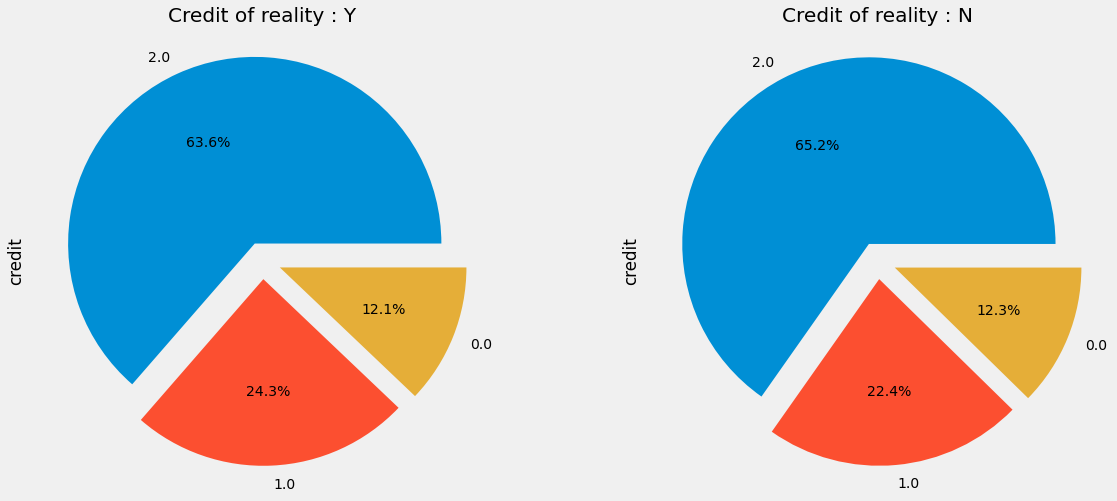

In [ ]:
credit_by_var_pie_chart("reality")

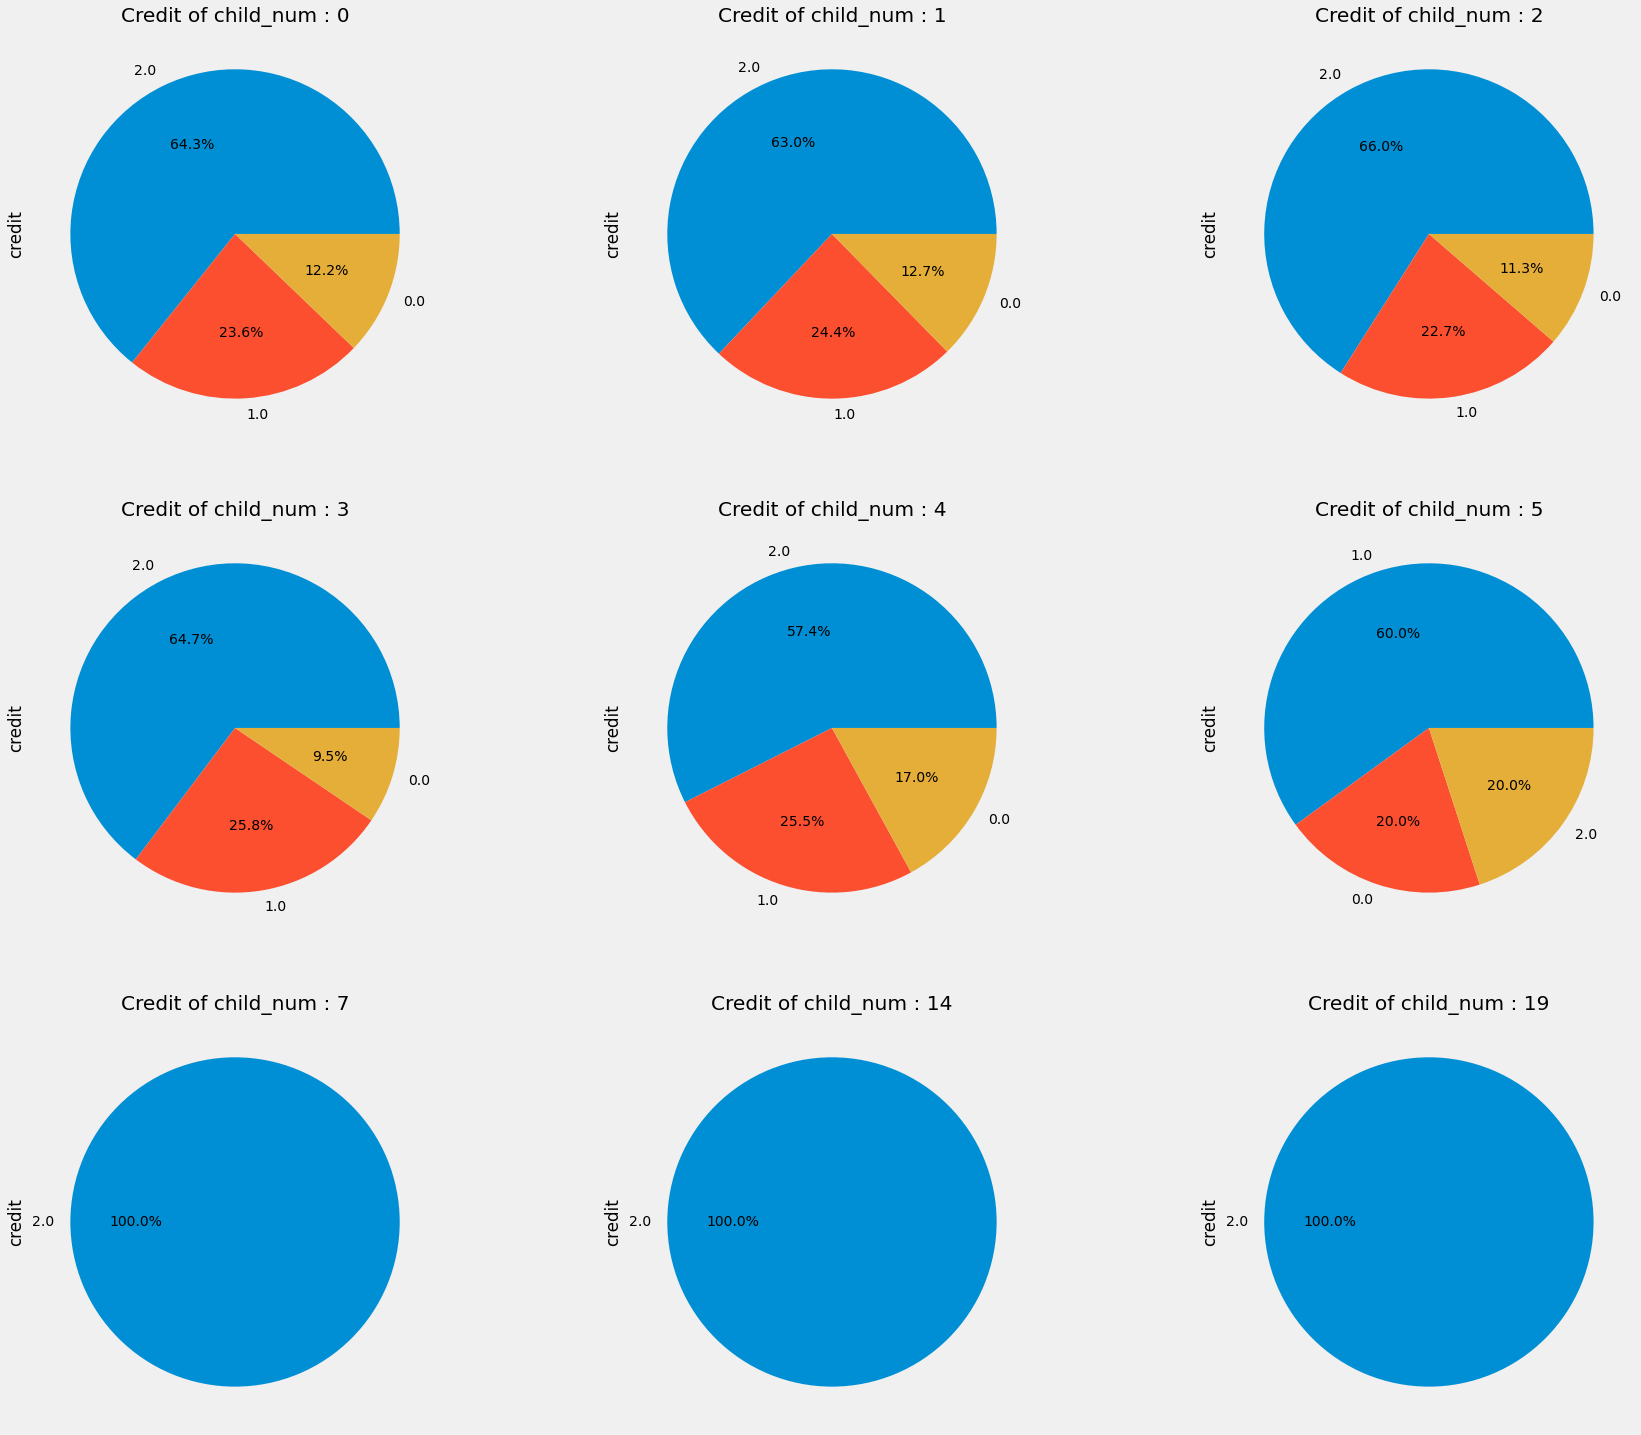

In [ ]:
credit_by_var_pie_chart("child_num")

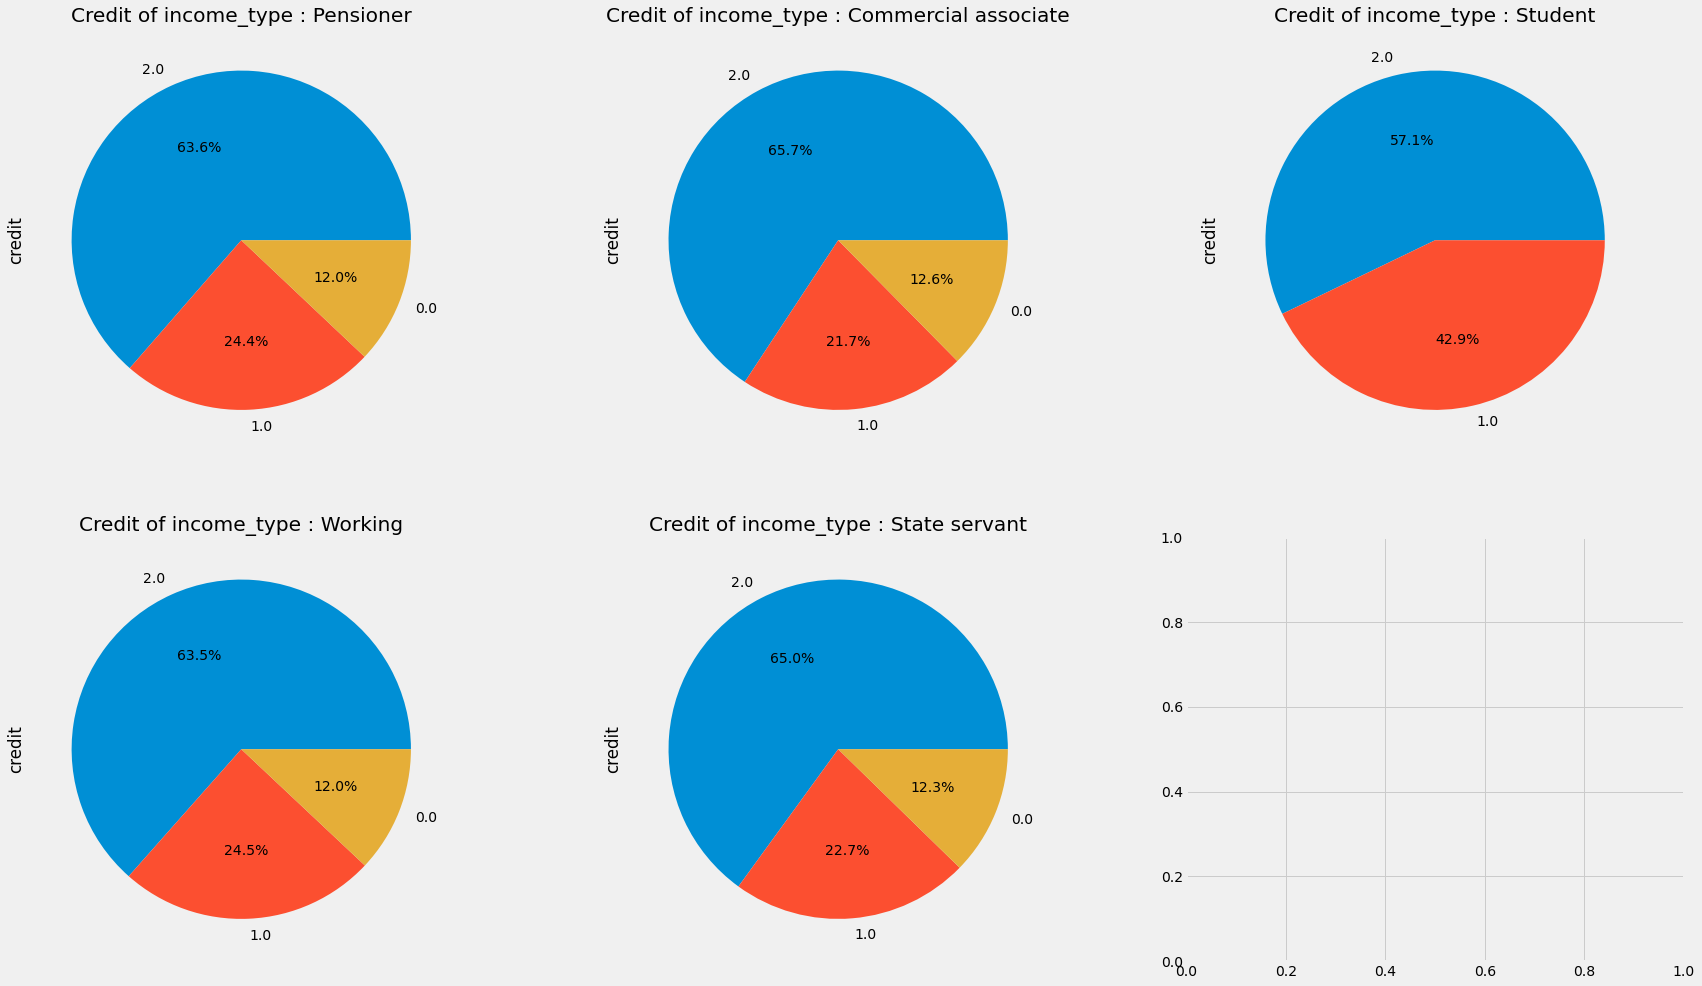

In [ ]:
credit_by_var_pie_chart("income_type")

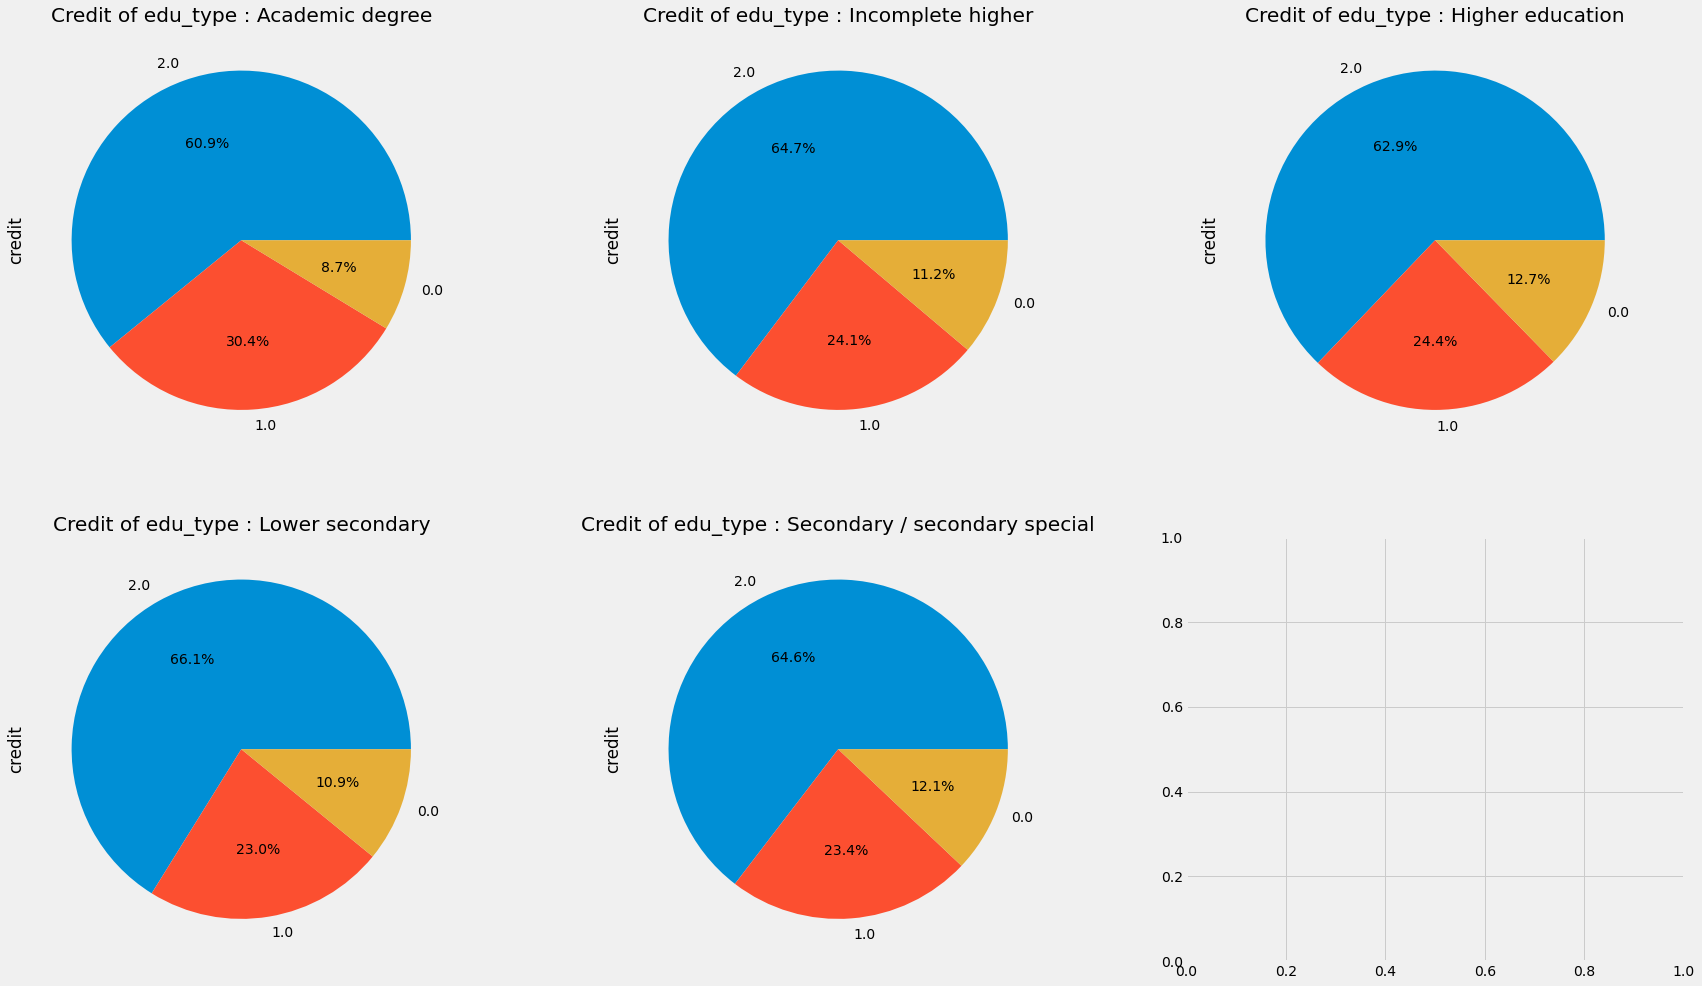

In [ ]:
credit_by_var_pie_chart("edu_type")

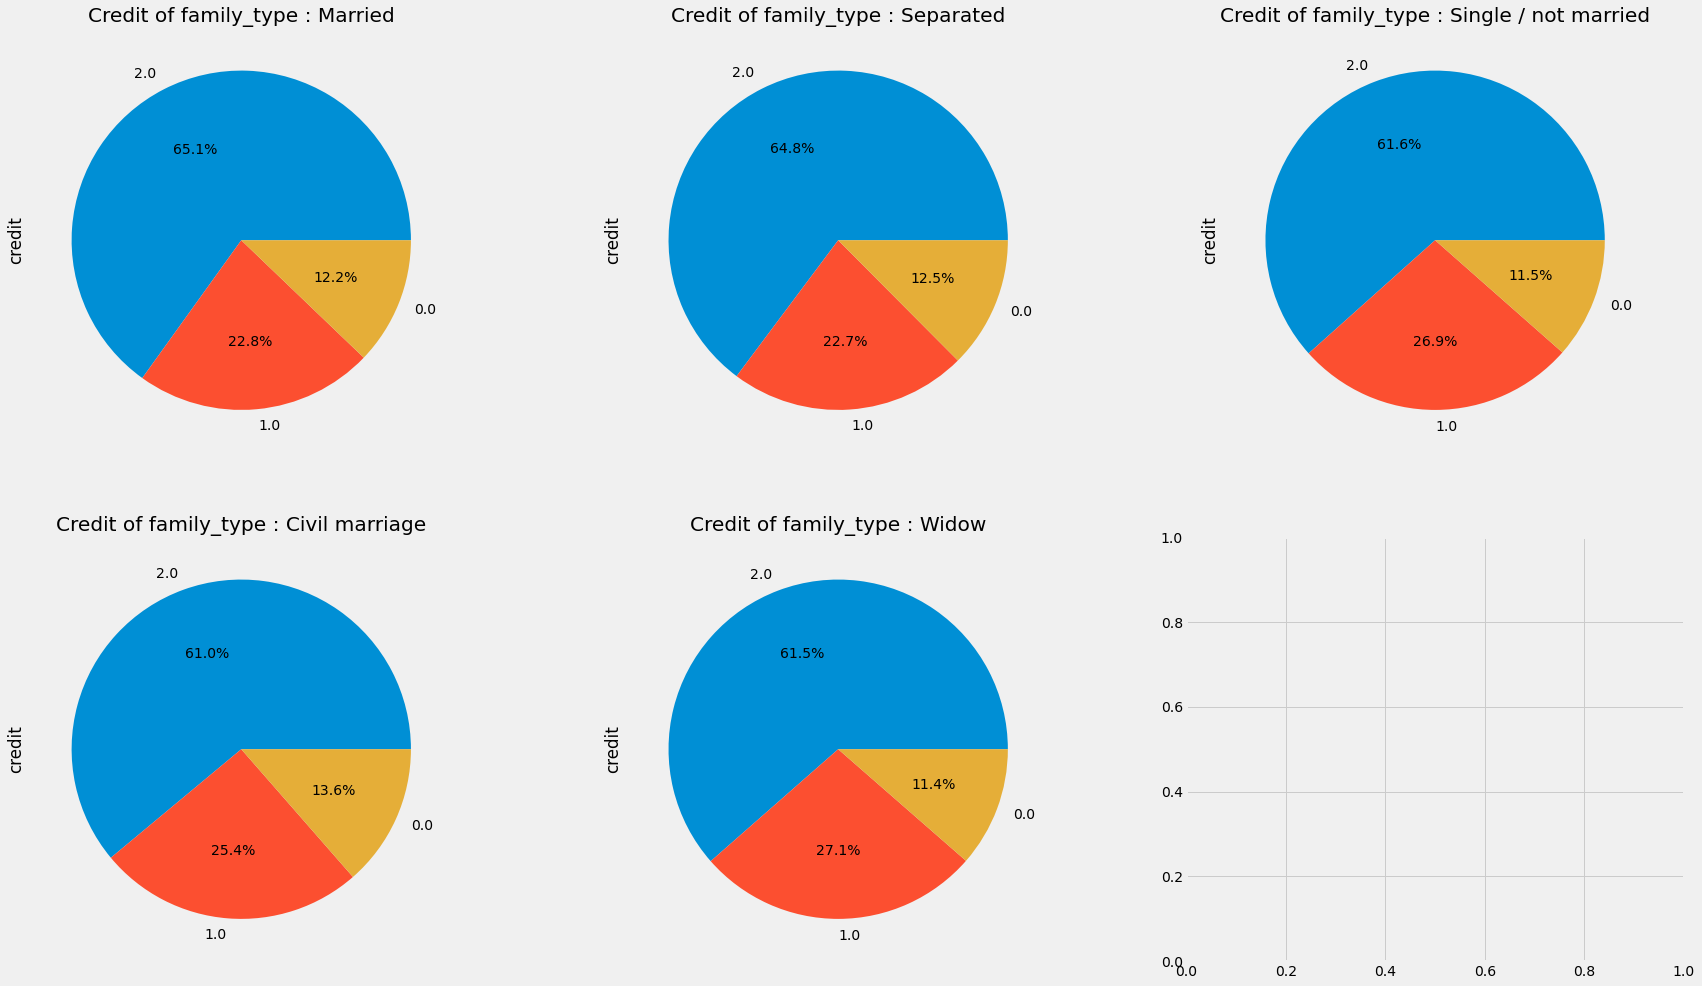

In [ ]:
credit_by_var_pie_chart("family_type")

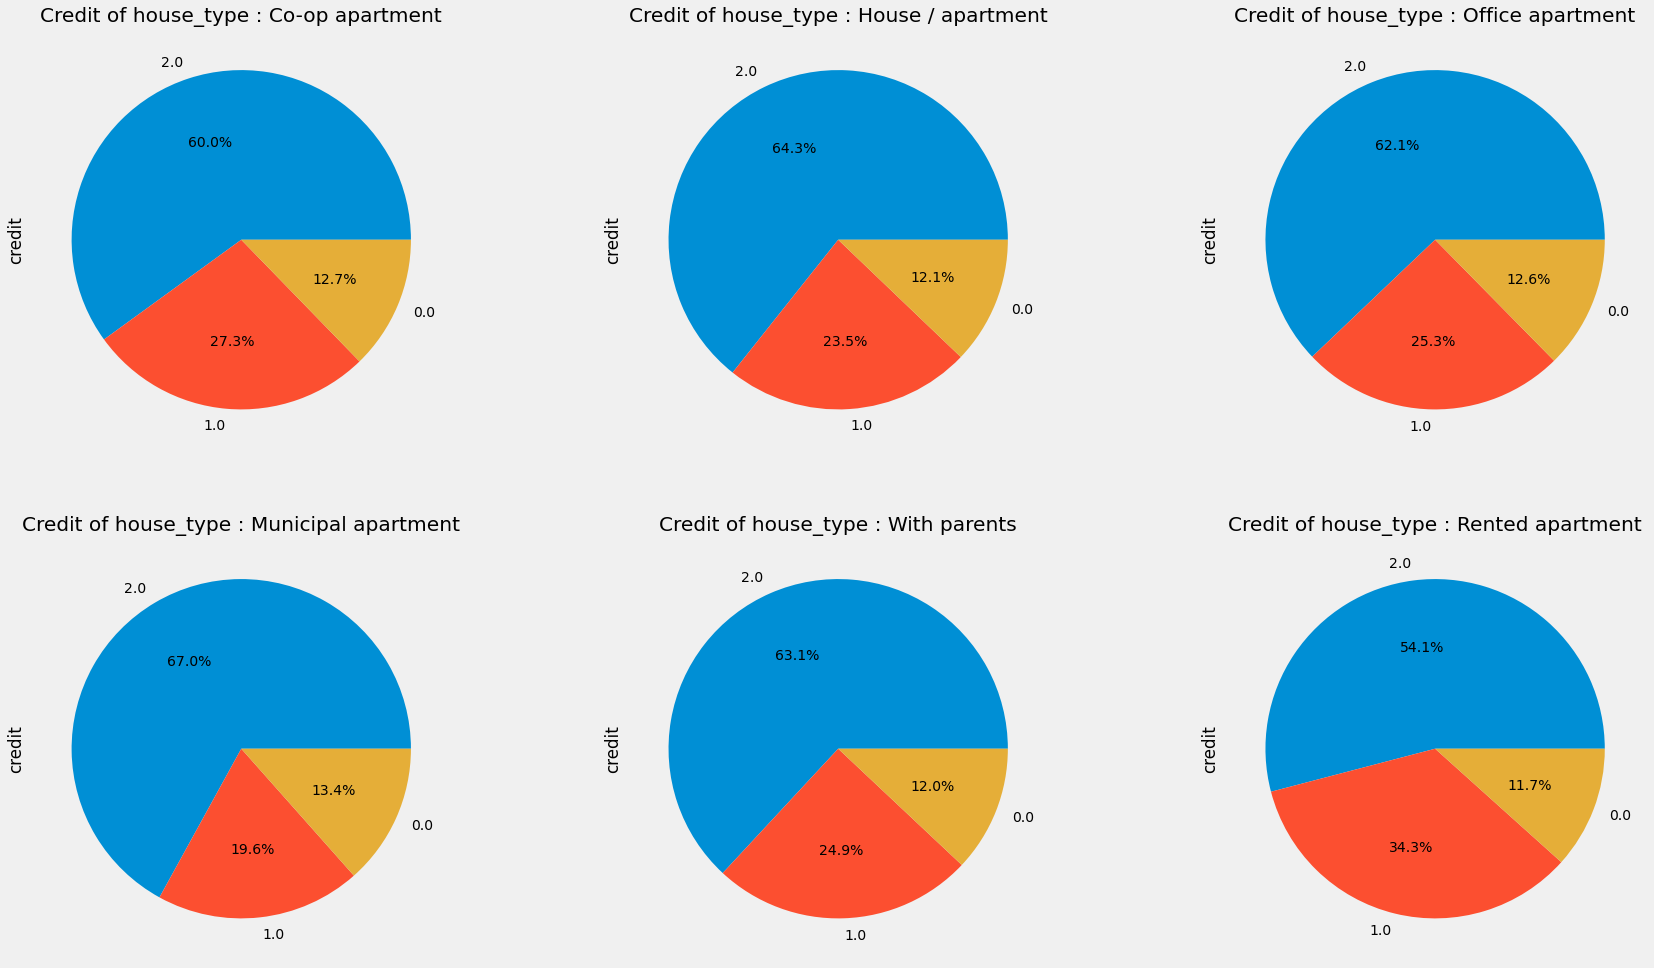

In [ ]:
credit_by_var_pie_chart("house_type")

good


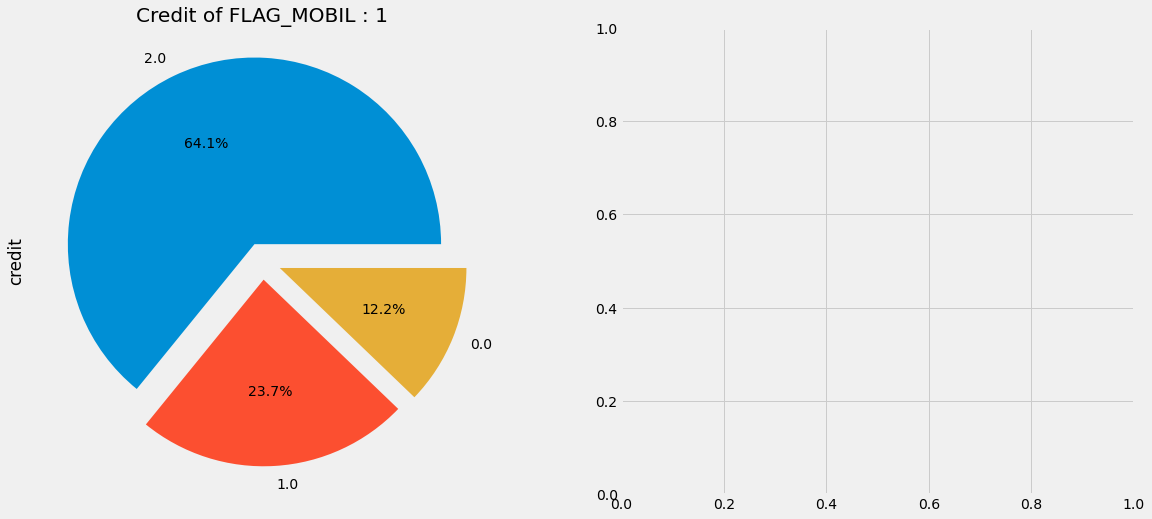

In [ ]:
credit_by_var_pie_chart("FLAG_MOBIL")

good


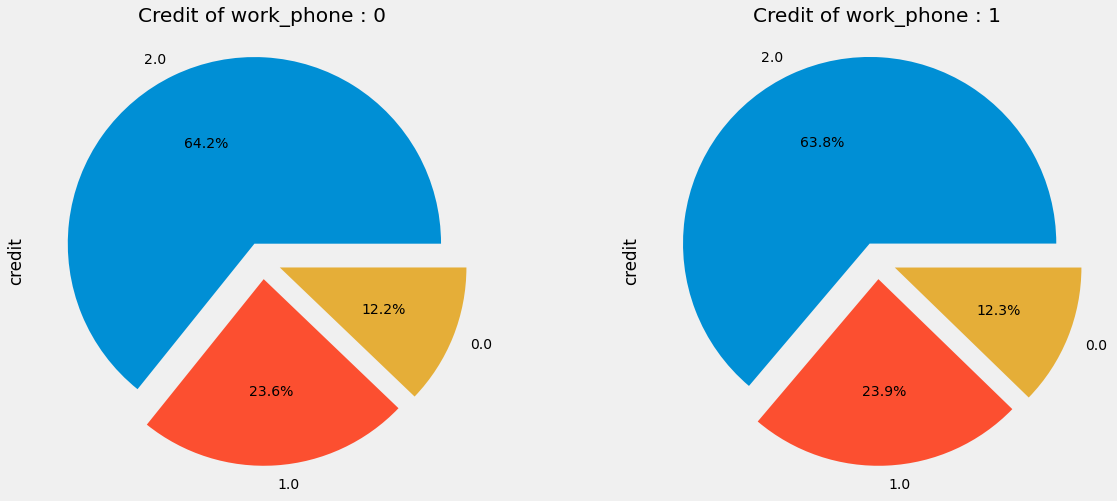

In [ ]:
credit_by_var_pie_chart("work_phone")

good


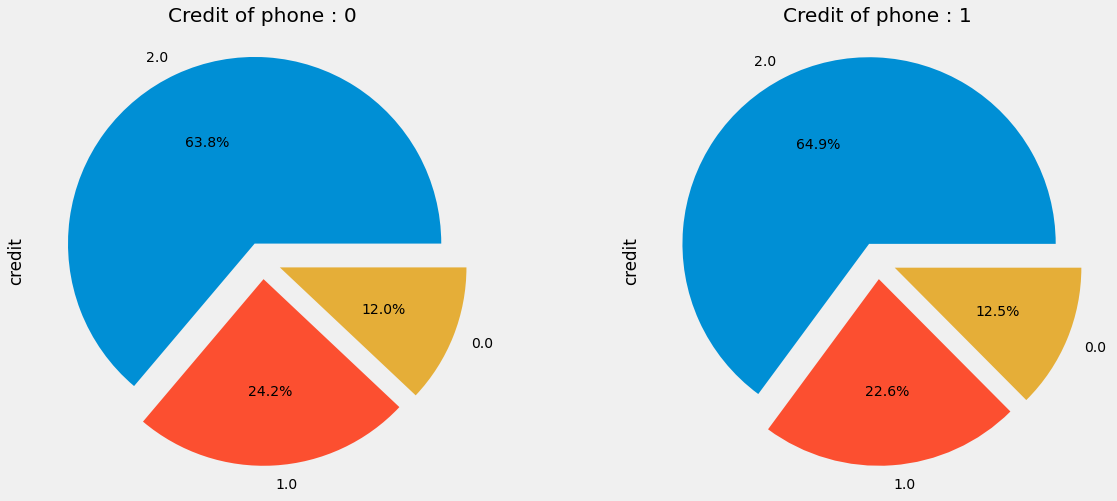

In [ ]:
credit_by_var_pie_chart("phone")

good


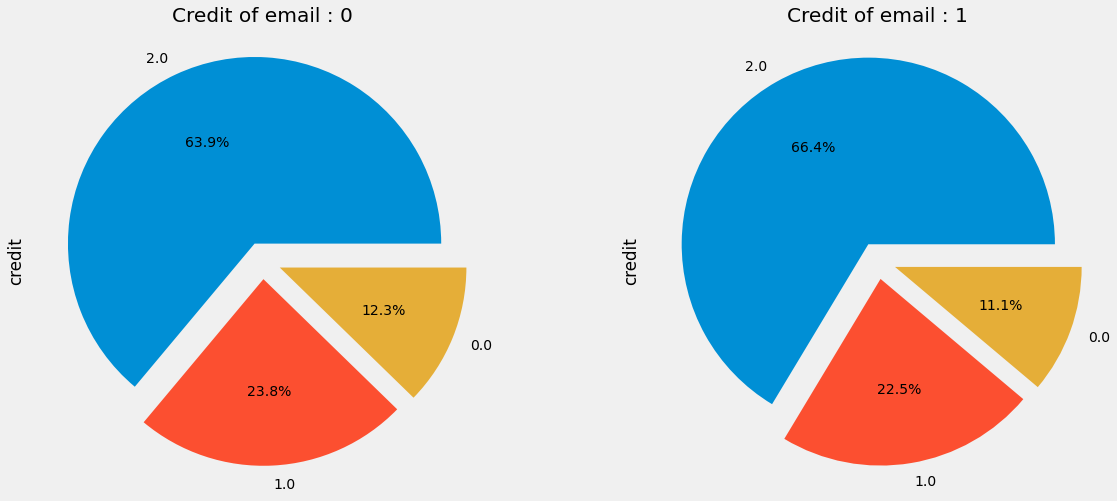

In [ ]:
credit_by_var_pie_chart("email")

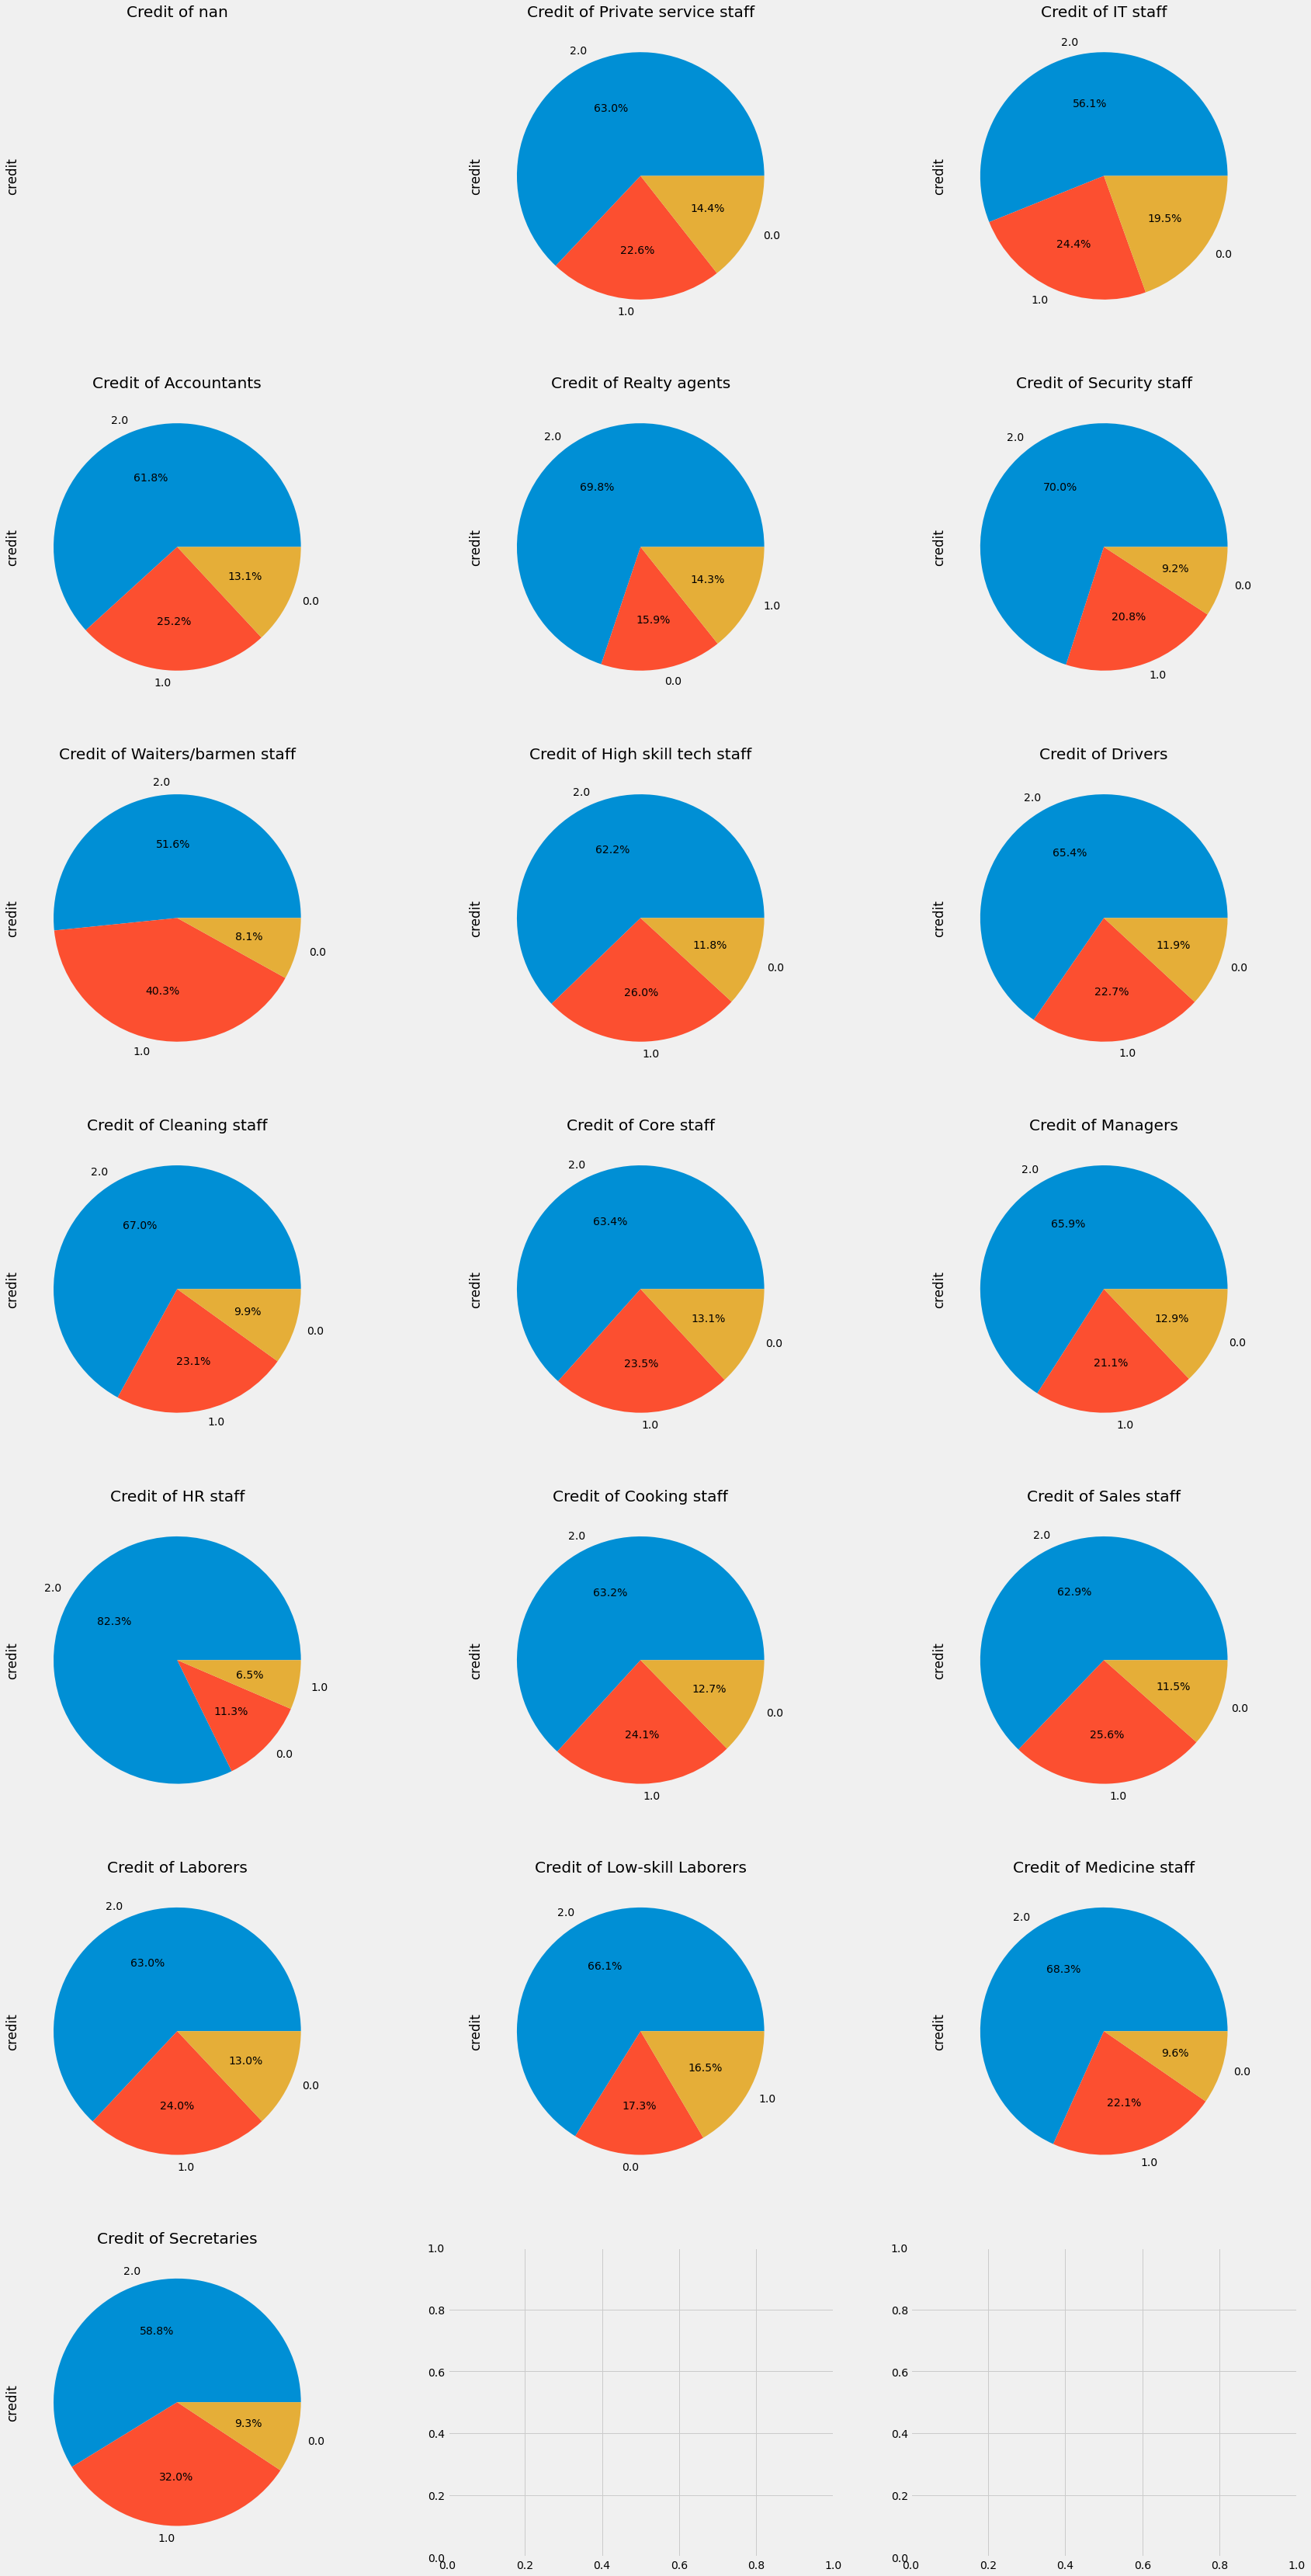

In [ ]:
credit_by_var_pie_chart("occyp_type")

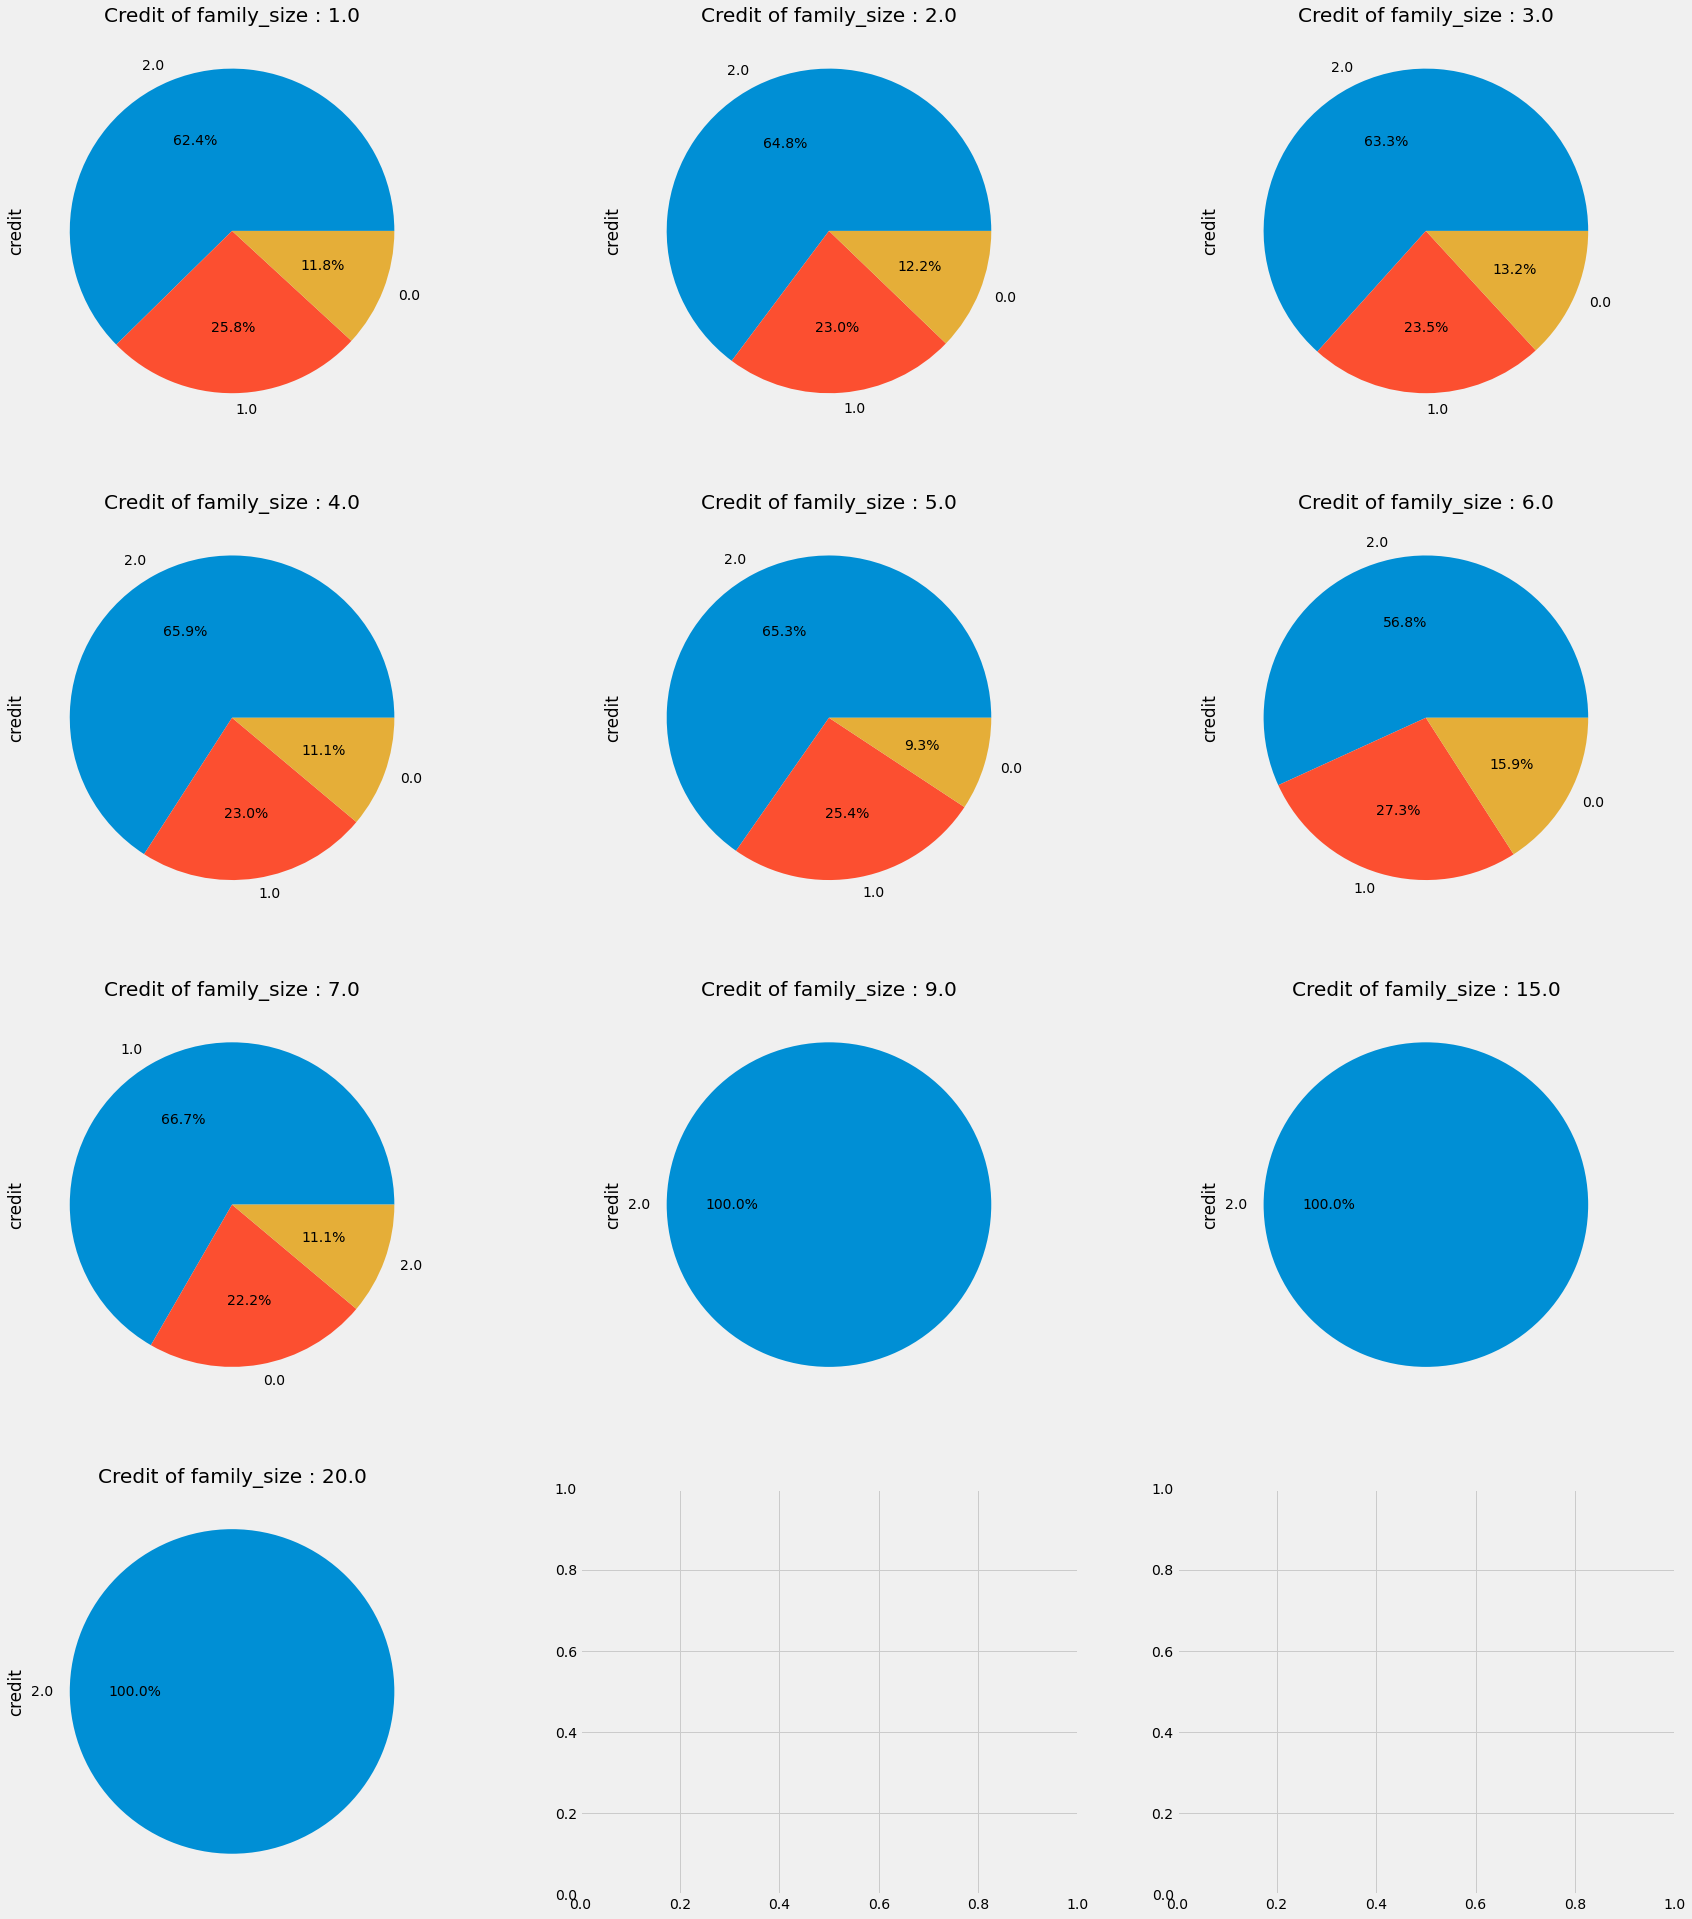

In [ ]:
credit_by_var_pie_chart("family_size")

# 연속형 변수

In [ ]:
train[ ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']]

,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,202500.0,-13899,-4709,-6.0
1,247500.0,-11380,-1540,-5.0
2,450000.0,-19087,-4434,-22.0
3,202500.0,-15088,-2092,-37.0
4,157500.0,-15037,-2105,-26.0
...,...,...,...,...
26452,225000.0,-12079,-1984,-2.0
26453,180000.0,-15291,-2475,-47.0
26454,292500.0,-10082,-2015,-25.0
26455,171000.0,-10145,-107,-59.0


In [ ]:
# 태어난 일수 -> 나이 변수
train['age'] = -np.floor(train['DAYS_BIRTH']/ (365 / 12) )

In [ ]:
# 일한 일수 -> 경력
train.query(" DAYS_EMPLOYED >= 0")['DAYS_EMPLOYED'].unique() # 일 안하는 사람은 365243

train['career'] = train['DAYS_EMPLOYED'].apply( lambda x : -x/(365 / 12) if x < 0 else 0)

In [ ]:
# 신용카드 사용한 월
train['card_using_month'] = train['begin_month'].apply(lambda x : -x)

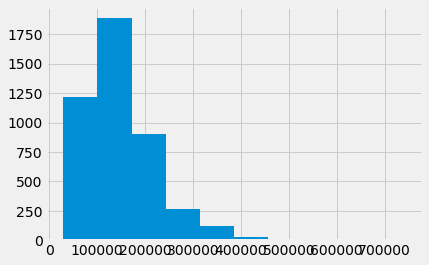

In [ ]:
# 소득
train.query(" career == 0 ")['income_total'].apply(lambda x : np.log(x) ).hist()

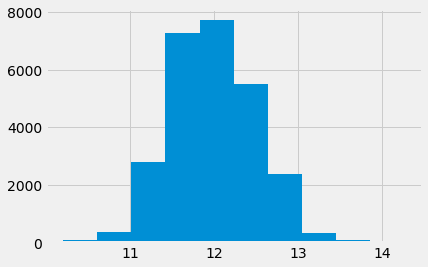

In [ ]:
# 소득 : 로그 변환하면 정규분포 같음
train['log_income_total'] =  train['income_total'].apply(lambda x : np.log(x) )
train['log_income_total'].hist()


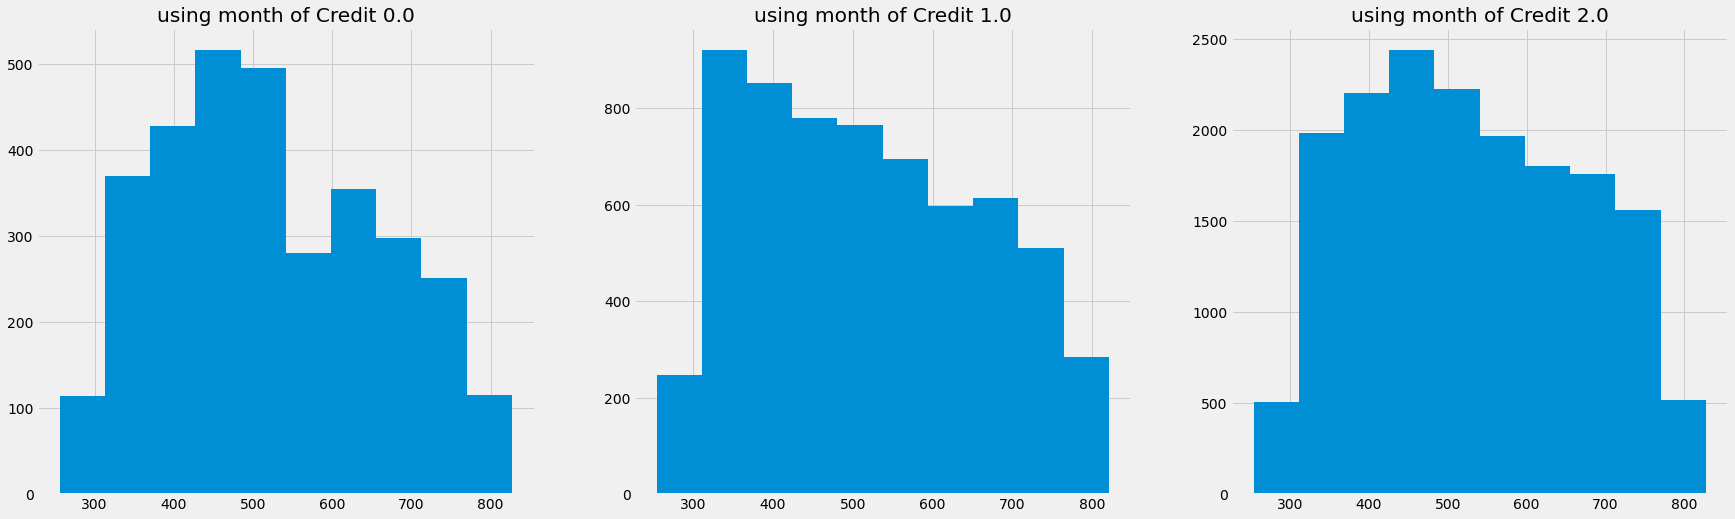

In [ ]:
unique_level = set(train['credit'])

f, ax = plt.subplots(1, 3, figsize = (9 * 3, 8 ))

for i, level in enumerate(unique_level) :
  train.query( f' credit == {level} ')['age'].hist(ax = ax[i])
  ax[i].set_title(f"age of Credit {level}")

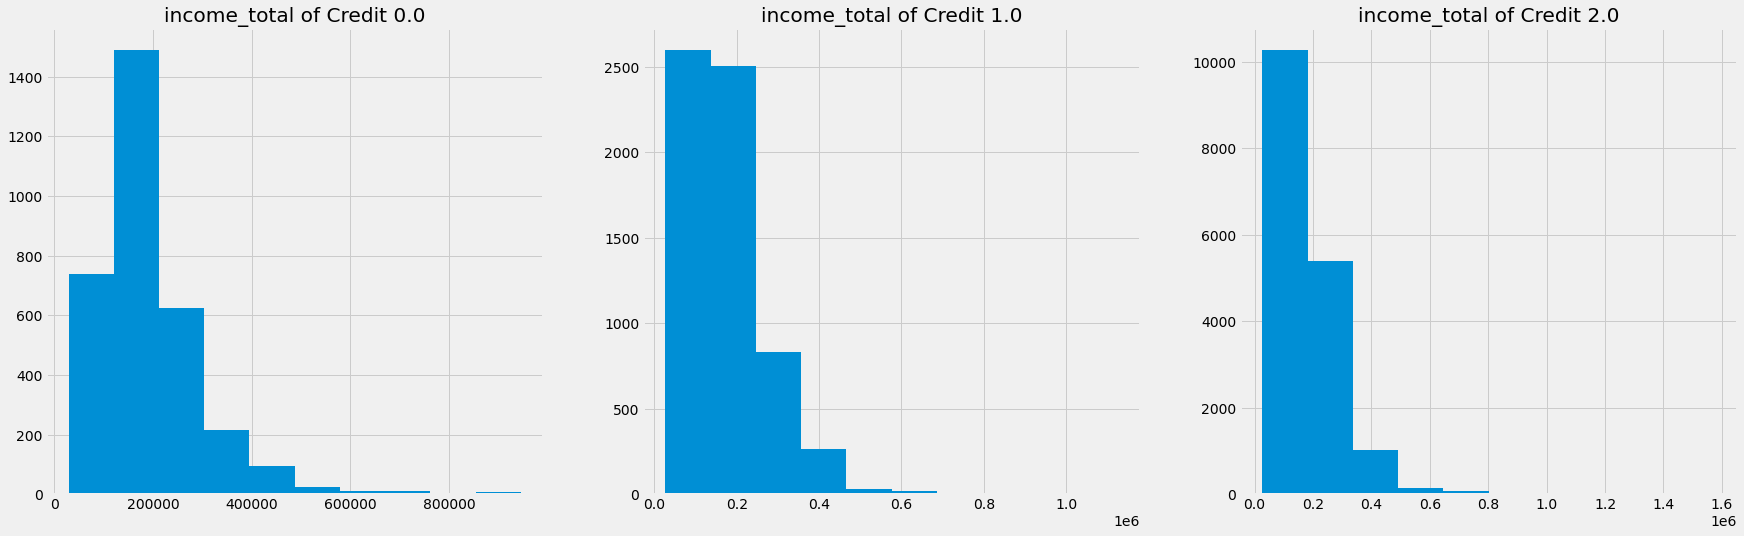

In [ ]:
unique_level = set(train['credit'])

f, ax = plt.subplots(1, 3, figsize = (9 * 3, 8 ))

for i, level in enumerate(unique_level) :
  train.query( f' credit == {level} ')['income_total'].hist(ax = ax[i])
  ax[i].set_title(f"income_total of Credit {level}")

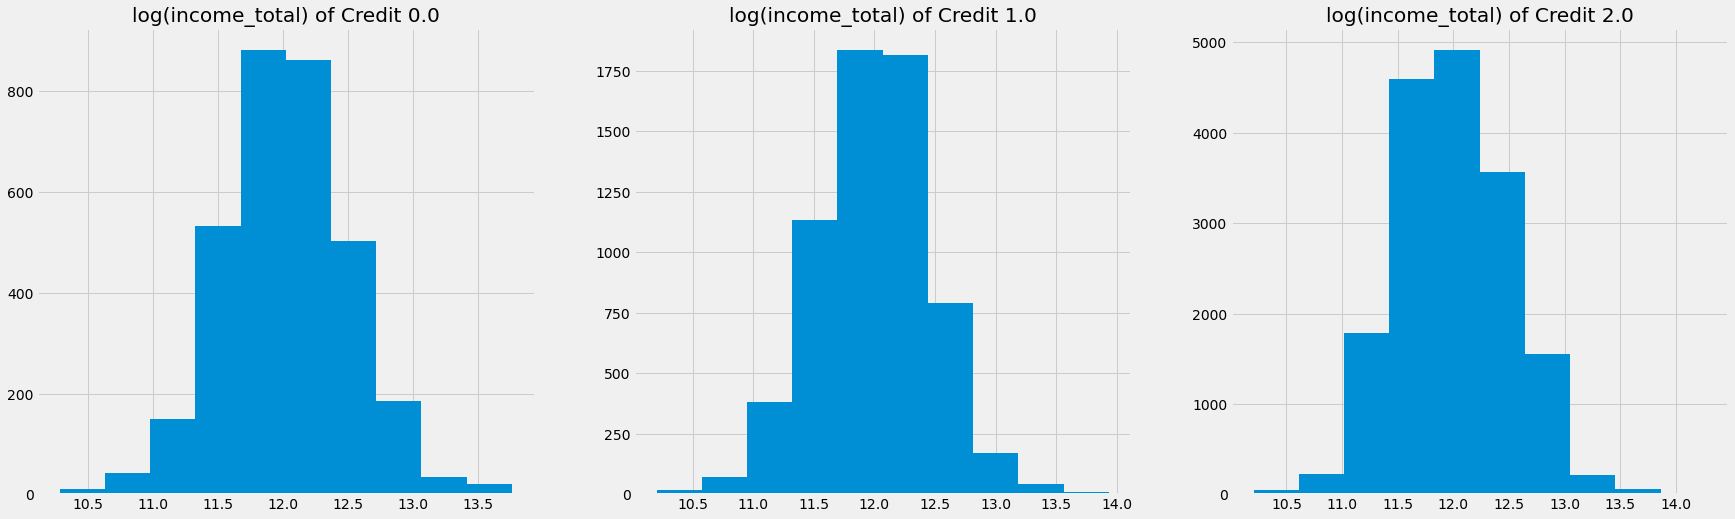

In [ ]:
unique_level = set(train['credit'])

f, ax = plt.subplots(1, 3, figsize = (9 * 3, 8 ))

for i, level in enumerate(unique_level) :
  train.query( f' credit == {level} ')['log_income_total'].hist(ax = ax[i])
  ax[i].set_title(f"log(income_total) of Credit {level}")

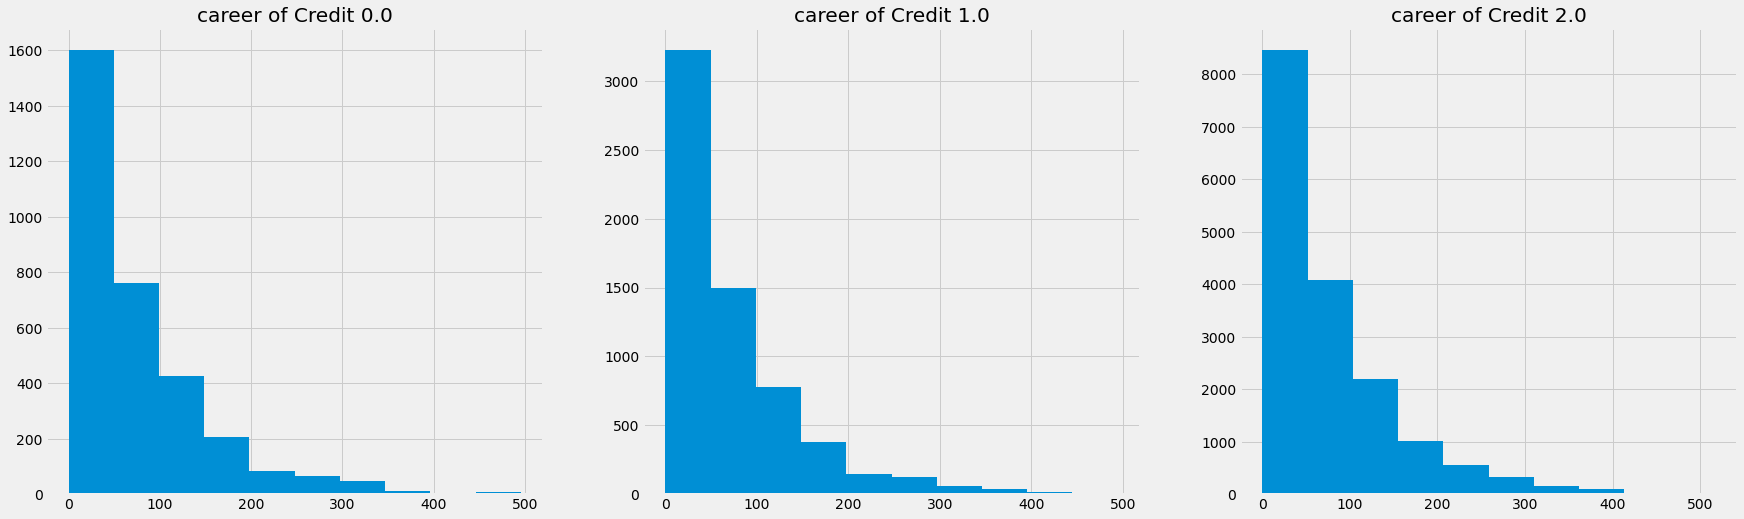

In [ ]:
unique_level = set(train['credit'])

f, ax = plt.subplots(1, 3, figsize = (9 * 3, 8 ))

for i, level in enumerate(unique_level) :
  train.query( f' credit == {level} ')['career'].hist(ax = ax[i])
  ax[i].set_title(f"career of Credit {level}")

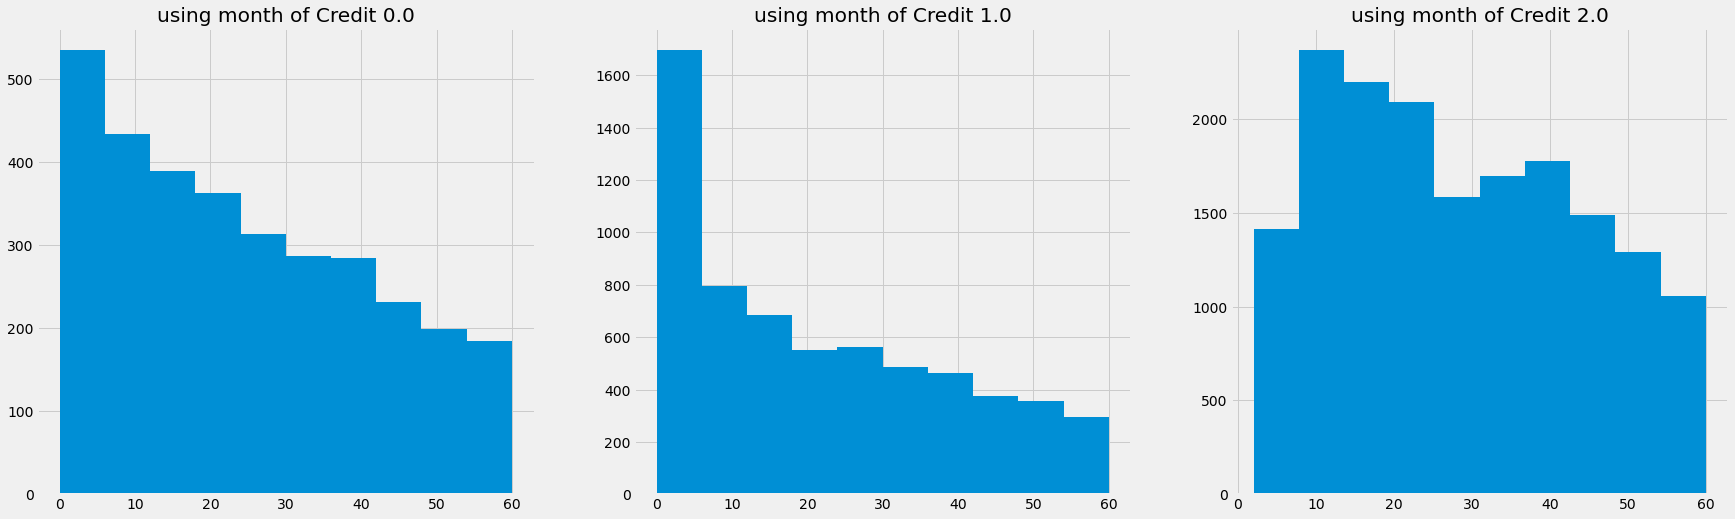

In [ ]:
unique_level = set(train['credit'])

f, ax = plt.subplots(1, 3, figsize = (9 * 3, 8 ))

for i, level in enumerate(unique_level) :
  train.query( f' credit == {level} ')['card_using_month'].hist(ax = ax[i])
  ax[i].set_title(f"using month of Credit {level}")

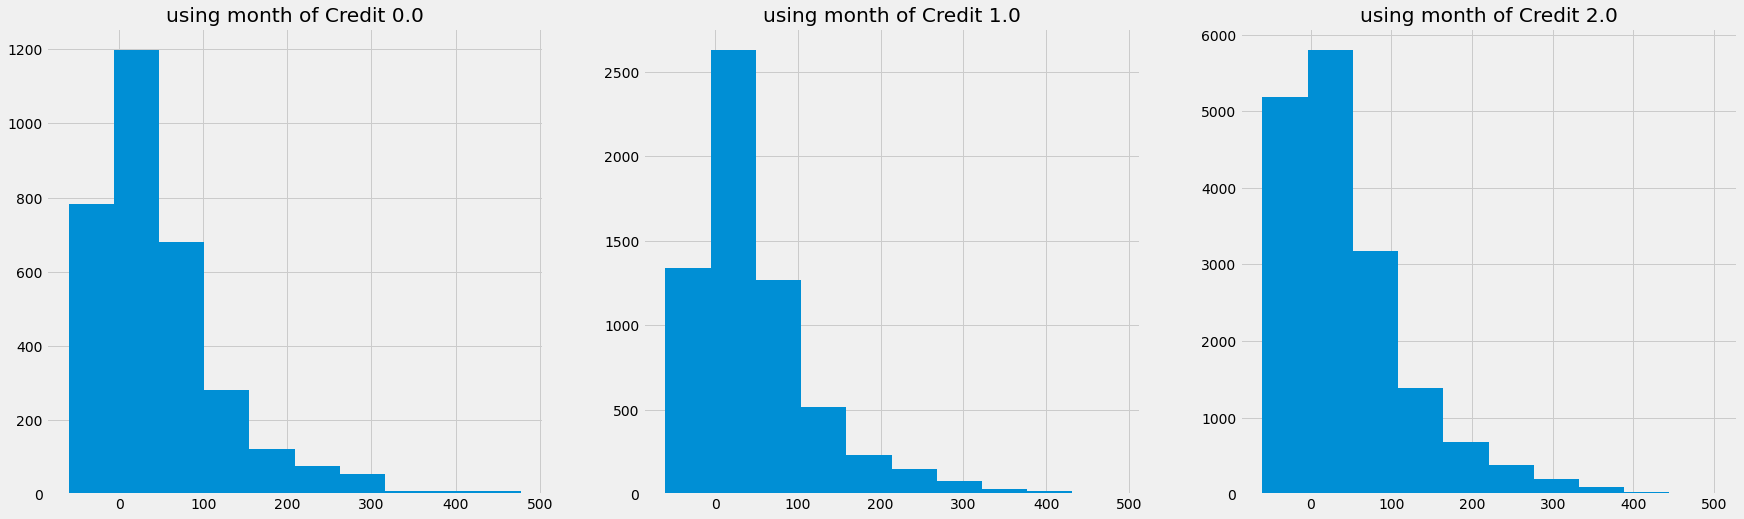

In [ ]:
train['career_using_month'] = train['career'] - train['card_using_month']
unique_level = set(train['credit'])

f, ax = plt.subplots(1, 3, figsize = (9 * 3, 8 ))

for i, level in enumerate(unique_level) :
  train.query( f' credit == {level} ')['career_using_month'].hist(ax = ax[i])
  ax[i].set_title(f"using month of Credit {level}")

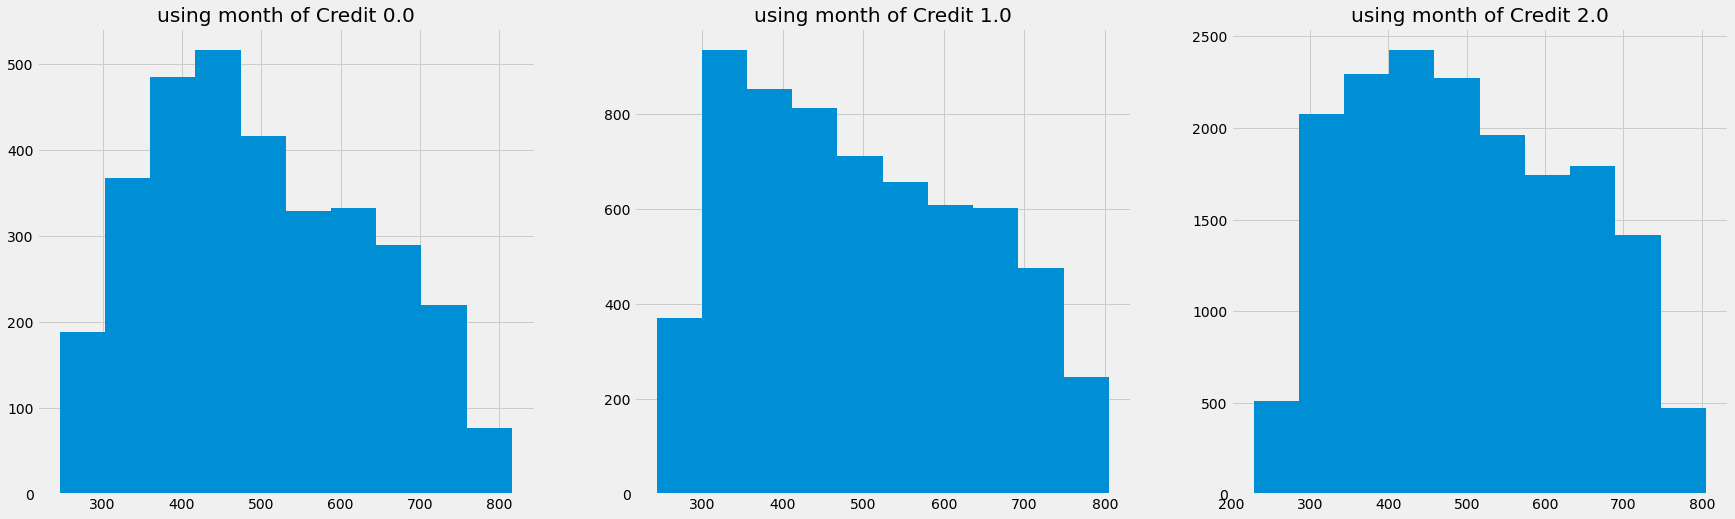

In [ ]:
train['age_using_month'] = train['age'] - train['card_using_month']
unique_level = set(train['credit'])

f, ax = plt.subplots(1, 3, figsize = (9 * 3, 8 ))

for i, level in enumerate(unique_level) :
  train.query( f' credit == {level} ')['age_using_month'].hist(ax = ax[i])
  ax[i].set_title(f"using month of Credit {level}")

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,career,card_using_month,log_income_total,age,career_using_month,age_using_month
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,154.816438,6.0,12.218495,457.0,148.816438,451.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,50.630137,5.0,12.419166,375.0,45.630137,370.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,145.775342,22.0,13.017003,628.0,123.775342,606.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,68.778082,37.0,12.218495,497.0,31.778082,460.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,69.205479,26.0,11.967181,495.0,43.205479,469.0


In [ ]:
train.isnull().sum(0)

index                    0
gender                   0
car                      0
reality                  0
child_num                0
income_total             0
income_type              0
edu_type                 0
family_type              0
house_type               0
DAYS_BIRTH               0
DAYS_EMPLOYED            0
FLAG_MOBIL               0
work_phone               0
phone                    0
email                    0
occyp_type            8171
family_size              0
begin_month              0
credit                   0
career                   0
card_using_month         0
log_income_total         0
age                      0
career_using_month       0
age_using_month          0
dtype: int64

In [ ]:
train[ train['occyp_type'].isnull() ]['income_type'].value_counts()

Pensioner               4440
Working                 2312
Commercial associate    1026
State servant            392
Student                    1
Name: income_type, dtype: int64

In [ ]:
pd.crosstab(train[ train['occyp_type'].isnull() ]['family_type'],
            train[ train['occyp_type'].isnull() ]['gender'])


gender,F,M
family_type,,
Civil marriage,411,156
Married,4036,1419
Separated,413,55
Single / not married,805,181
Widow,684,11


In [ ]:
pd.crosstab(train['income_type'],
            train['occyp_type'])

occyp_type,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
income_type,,,,,,,,,,,,,,,,,,
Commercial associate,363,80,92,609,418,21,306,15,1075,33,846,127,96,43,860,14,138,40
Pensioner,1,0,0,2,1,0,0,0,3,0,1,1,0,0,0,0,0,0
State servant,69,16,41,655,87,3,148,6,142,3,226,274,15,0,10,22,14,31
Student,0,0,0,4,0,0,0,0,2,0,0,0,0,0,0,0,0,0
Working,469,307,324,1376,1069,38,586,20,3290,91,1094,462,132,20,1669,61,272,53


In [ ]:
train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [ ]:
train.query( " income_type == 'Pensioner' ")[['occyp_type', 'credit']].value_counts()

occyp_type      credit
Laborers        2.0       3
Core staff      2.0       2
Medicine staff  2.0       1
Managers        2.0       1
Drivers         2.0       1
Accountants     2.0       1
dtype: int64

In [ ]:
train[ -train['occyp_type'].isnull() ].query( " income_type == 'Pensioner' ")[['occyp_type', 'credit', 'income_total']]

,occyp_type,credit,income_total
1964,Medicine staff,2.0,157500.0
5786,Laborers,2.0,247500.0
6695,Core staff,2.0,270000.0
9793,Laborers,2.0,180000.0
10357,Drivers,2.0,157500.0
14356,Laborers,2.0,292500.0
17278,Core staff,2.0,292500.0
23227,Accountants,2.0,270000.0
26159,Managers,2.0,450000.0


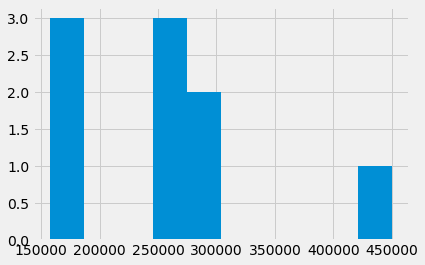

In [ ]:
train[ -train['occyp_type'].isnull() ].query( " income_type == 'Pensioner'  ")['income_total'].hist()

occyp_type 을 판별하는 모형을 먼저 만들어서 결측치를 추가하도록하자

validation set을 만들어야한다.